<a href="https://colab.research.google.com/github/ttlttk8161/-PBL-Reinforcement-learning/blob/main/3_sarsa_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# State-Action-Reward-State-Action (SARSA) ÏïåÍ≥†Î¶¨Ï¶ò

```text
# SARSA ÏïåÍ≥†Î¶¨Ï¶ò
1. Q(s,a)Î•º ÏûÑÏùòÏùò Í∞íÏúºÎ°ú Ï¥àÍ∏∞Ìôî
2. Î∞òÎ≥µ:
   a. ÌòÑÏû¨ ÏÉÅÌÉú s Í¥ÄÏ∞∞
   b. Ï†ïÏ±ÖÏóê Îî∞Îùº ÌñâÎèô a ÏÑ†ÌÉù (Ïòà: Œµ-greedy)
   c. ÌñâÎèô a Ïã§Ìñâ
   d. Î≥¥ÏÉÅ rÍ≥º Îã§Ïùå ÏÉÅÌÉú s' Í¥ÄÏ∞∞
   e. Îã§Ïùå ÏÉÅÌÉú s'ÏóêÏÑú Ï†ïÏ±ÖÏóê Îî∞Îùº Îã§Ïùå ÌñâÎèô a' ÏÑ†ÌÉù
   f. Q(s,a) = Q(s,a) + Œ±[r + Œ≥Q(s',a') - Q(s,a)]
   g. s = s', a = a'Î°ú Í∞±Ïã†
```

In [ ]:
!pip install koreanize_matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 34.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Í∞ÑÎã®Ìïú Í∑∏Î¶¨Îìú ÌôòÍ≤Ω ÏÑ§Ï†ï (4x4 Í≤©Ïûê)
grid_size = 4  # Í≤©Ïûê ÌÅ¨Í∏∞
num_states = grid_size * grid_size  # Ï†ÑÏ≤¥ ÏÉÅÌÉú Í∞úÏàò (16Í∞ú)
num_actions = 4  # ÌñâÎèô Í∞úÏàò (ÏÉÅ, Ìïò, Ï¢å, Ïö∞)

# ÌñâÎèô Ï†ïÏùò (ÏÉÅ: 0, Ìïò: 1, Ï¢å: 2, Ïö∞: 3)
actions = [0, 1, 2, 3]
action_names = ['ÏúÑ', 'ÏïÑÎûò', 'ÏôºÏ™Ω', 'Ïò§Î•∏Ï™Ω']

# Î™©Ìëú ÏÉÅÌÉúÏôÄ ÏãúÏûë ÏÉÅÌÉú ÏÑ§Ï†ï
start_state = 0  # ÏãúÏûë ÏúÑÏπò (0,0)
goal_state = 15  # Î™©Ìëú ÏúÑÏπò (3,3)

# SARSA Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ï
alpha = 0.1  # ÌïôÏäµÎ•† (ÏñºÎßàÎÇò Îπ®Î¶¨ Î∞∞Ïö∏ÏßÄ)
gamma = 0.9  # Ìï†Ïù∏Ïú® (ÎØ∏Îûò Î≥¥ÏÉÅÏùÑ ÏñºÎßàÎÇò Ï§ëÏöîÌïòÍ≤å Î≥ºÏßÄ)
epsilon = 0.1  # ÌÉêÌóòÎ•† (ÏñºÎßàÎÇò ÏûêÏ£º ÏÉàÎ°úÏö¥ ÌñâÎèôÏùÑ ÏãúÎèÑÌï†ÏßÄ)
episodes = 1000  # ÌïôÏäµ ÏóêÌîºÏÜåÎìú Ïàò

# 1. Q(s,a)Î•º ÏûÑÏùòÏùò Í∞íÏúºÎ°ú Ï¥àÍ∏∞Ìôî
q_table = np.zeros((num_states, num_actions))  # QÌÖåÏù¥Î∏îÏùÑ 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:

print("QÌÖåÏù¥Î∏î Ï¥àÍ∏∞Ìôî ÏôÑÎ£å!")
print(f"QÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: {q_table.shape}")

# ÏÉÅÌÉúÎ•º (Ìñâ, Ïó¥) Ï¢åÌëúÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò Í∏∞Îä•ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑ
def state_to_position(state):
    row = state // grid_size
    col = state % grid_size
    return row, col

# (Ìñâ, Ïó¥) Ï¢åÌëúÎ•º ÏÉÅÌÉúÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò Í∏∞Îä•ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑ
def position_to_state(row, col):
    return row * grid_size + col

# ÌñâÎèôÏóê Îî∞Î•∏ Îã§Ïùå ÏÉÅÌÉú Í≥ÑÏÇ∞
def get_next_state(current_state, action):
    row, col = state_to_position(current_state)

    # ÌñâÎèôÏóê Îî∞Îùº ÏúÑÏπò Î≥ÄÍ≤Ω
    if action == 0:  # ÏúÑÎ°ú Ïù¥Îèô
        row = max(0, row - 1)
    elif action == 1:  # ÏïÑÎûòÎ°ú Ïù¥Îèô
        row = min(grid_size - 1, row + 1)
    elif action == 2:  # ÏôºÏ™ΩÏúºÎ°ú Ïù¥Îèô
        col = max(0, col - 1)
    elif action == 3:  # Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥Îèô
        col = min(grid_size - 1, col + 1)

    return position_to_state(row, col)

# Î≥¥ÏÉÅ Í≥ÑÏÇ∞
def get_reward(state):
    if state == goal_state:
        return 100  # Î™©ÌëúÏóê ÎèÑÎã¨ÌïòÎ©¥ ÌÅ∞ Î≥¥ÏÉÅ
    else:
        return -1   # Îã§Î•∏ Í≥≥ÏóêÏÑúÎäî ÏûëÏùÄ Î≤åÏ†ê

# Œµ-greedy Ï†ïÏ±ÖÏúºÎ°ú ÌñâÎèô ÏÑ†ÌÉù
def choose_action(state, q_table, epsilon):
    if np.random.random() < epsilon:
        # ÌÉêÌóò: Î¨¥ÏûëÏúÑ ÌñâÎèô ÏÑ†ÌÉù
        return np.random.choice(actions)
    else:
        # ÌôúÏö©: Í∞ÄÏû• Ï¢ãÏùÄ ÌñâÎèô ÏÑ†ÌÉù
        return np.argmax(q_table[state])

# ÏóêÌîºÏÜåÎìúÎ≥Ñ Ï¥ù Î≥¥ÏÉÅ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
episode_rewards = []

print("\nSARSA ÌïôÏäµ ÏãúÏûë!")
print("=" * 50)

# 2. Î∞òÎ≥µ ÌïôÏäµ ÏãúÏûë
for episode in range(episodes):
    # a. ÌòÑÏû¨ ÏÉÅÌÉú s Í¥ÄÏ∞∞ (ÏãúÏûë ÏÉÅÌÉúÎ°ú Ï¥àÍ∏∞Ìôî)
    current_state = start_state

    # b. Ï†ïÏ±ÖÏóê Îî∞Îùº ÌñâÎèô a ÏÑ†ÌÉù (Œµ-greedy)
    current_action = choose_action(current_state, q_table, epsilon)

    total_reward = 0  # ÏóêÌîºÏÜåÎìú Ï¥ù Î≥¥ÏÉÅ
    steps = 0         # ÏóêÌîºÏÜåÎìú ÎÇ¥ Ïä§ÌÖù Ïàò

    # Ìïú ÏóêÌîºÏÜåÎìú ÏßÑÌñâ
    while current_state != goal_state and steps < 100:  # ÏµúÎåÄ 100Ïä§ÌÖù Ï†úÌïú
        # c. ÌñâÎèô a Ïã§Ìñâ
        # d. Î≥¥ÏÉÅ rÍ≥º Îã§Ïùå ÏÉÅÌÉú s' Í¥ÄÏ∞∞
        next_state = get_next_state(current_state, current_action)
        reward = get_reward(next_state)

        # e. Îã§Ïùå ÏÉÅÌÉú s'ÏóêÏÑú Ï†ïÏ±ÖÏóê Îî∞Îùº Îã§Ïùå ÌñâÎèô a' ÏÑ†ÌÉù
        next_action = choose_action(next_state, q_table, epsilon)

        # f. Q(s,a) = Q(s,a) + Œ±[r + Œ≥Q(s',a') - Q(s,a)] (SARSA ÏóÖÎç∞Ïù¥Ìä∏)
        old_q_value = q_table[current_state, current_action]
        next_q_value = q_table[next_state, next_action]

        # [TODO] SARSA ÏóÖÎç∞Ïù¥Ìä∏ÏóêÏÑú TD Ïò§Ï∞®Î•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî
        # TD Ïò§Ï∞® = r + Œ≥Q(s',a') - Q(s,a)
        td_error = _____ + _____ * _____ - _____

        # [TODO] QÍ∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏÑ∏Ïöî
        # Q(s,a) = Q(s,a) + Œ± * TD_error
        q_table[current_state, current_action] = _____ + _____ * _____

        # g. s = s', a = a'Î°ú Í∞±Ïã†
        # [TODO] ÌòÑÏû¨ ÏÉÅÌÉúÏôÄ ÌñâÎèôÏùÑ Îã§Ïùå ÏÉÅÌÉúÏôÄ ÌñâÎèôÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏÑ∏Ïöî
        current_state = _____
        current_action = _____

        total_reward += reward
        steps += 1

    episode_rewards.append(total_reward)

    # 100 ÏóêÌîºÏÜåÎìúÎßàÎã§ ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†•
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(episode_rewards[-100:])
        print(f"ÏóêÌîºÏÜåÎìú {episode + 1}: ÌèâÍ∑† Î≥¥ÏÉÅ = {avg_reward:.2f}")

print("\nÌïôÏäµ ÏôÑÎ£å!")
print("=" * 50)
# Q-tableÏùÑ Ïù¥ÏÅòÍ≤å Ï∂úÎ†•
print("\nüìä ÏµúÏ¢Ö Q-ÌÖåÏù¥Î∏î")
import pandas as pd

# QÌÖåÏù¥Î∏îÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôò
q_data = []
for state in range(num_states):
    row, col = state_to_position(state)
    q_values = q_table[state]
    q_data.append({
        'ÏÉÅÌÉú': f"({row},{col})",
        'ÏÉÅ': f"{q_values[0]:.3f}",
        'Ìïò': f"{q_values[1]:.3f}",
        'Ï¢å': f"{q_values[2]:.3f}",
        'Ïö∞': f"{q_values[3]:.3f}"
    })

# DataFrame ÏÉùÏÑ±
q_df = pd.DataFrame(q_data)

# Í∞Å ÌñâÏóêÏÑú ÏµúÎåÄÍ∞íÏóê ÏÉâÏÉÅ Ï†ÅÏö©
def highlight_max(s):
    # Ïà´Ïûê Ïª¨ÎüºÎßå ÏÑ†ÌÉù (ÏÉÅ, Ìïò, Ï¢å, Ïö∞)
    numeric_cols = ['ÏÉÅ', 'Ìïò', 'Ï¢å', 'Ïö∞']
    numeric_values = s[numeric_cols].astype(float)

    # ÏµúÎåÄÍ∞í Ï∞æÍ∏∞
    max_val = numeric_values.max()

    # Ïä§ÌÉÄÏùº Ï†ÅÏö©
    styles = [''] * len(s)
    for i, col in enumerate(numeric_cols):
        if float(s[col]) == max_val:
            styles[i+1] = 'background-color: yellow; font-weight: bold'

    return styles

# Ïä§ÌÉÄÏùº Ï†ÅÏö©ÌïòÏó¨ Ï∂úÎ†•
styled_df = q_df.style.apply(highlight_max, axis=1)
display(styled_df)

QÌÖåÏù¥Î∏î Ï¥àÍ∏∞Ìôî ÏôÑÎ£å!
QÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: (16, 4)

SARSA ÌïôÏäµ ÏãúÏûë!


NameError: name '_____' is not defined

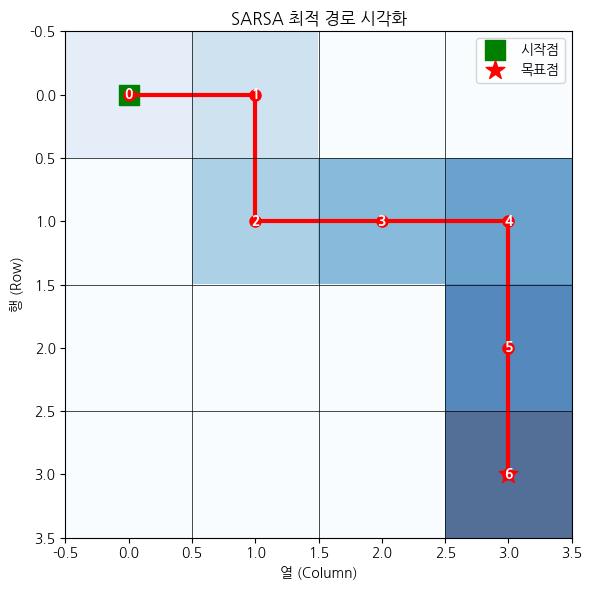

In [ ]:
# ÏµúÏ†Å Í≤ΩÎ°ú Ï∞æÍ∏∞
# ÏµúÏ†Å Í≤ΩÎ°ú Ï∞æÍ∏∞
current_state = start_state
path = [current_state]
steps = 0

while current_state != goal_state and steps < 20:
    # Í∞ÄÏû• Ï¢ãÏùÄ ÌñâÎèô ÏÑ†ÌÉù (ÌÉêÌóò ÏóÜÏù¥)
    best_action = np.argmax(q_table[current_state])
    current_state = get_next_state(current_state, best_action)
    path.append(current_state)
    steps += 1

# ÏµúÏ†Å Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))

# Í∑∏Î¶¨Îìú ÏÉùÏÑ±
grid_visual = np.zeros((grid_size, grid_size))

# Í≤ΩÎ°ú ÌëúÏãú
for i, state in enumerate(path):
    row, col = state_to_position(state)
    grid_visual[row, col] = i + 1

# ÌûàÌä∏ÎßµÏúºÎ°ú Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî
plt.imshow(grid_visual, cmap='Blues', alpha=0.7)

# Í≤ΩÎ°ú ÏÑ† Í∑∏Î¶¨Í∏∞
path_rows = [state_to_position(state)[0] for state in path]
path_cols = [state_to_position(state)[1] for state in path]
plt.plot(path_cols, path_rows, 'r-', linewidth=3, marker='o', markersize=8)

# ÏãúÏûëÏ†êÍ≥º Î™©ÌëúÏ†ê Í∞ïÏ°∞
start_row, start_col = state_to_position(start_state)
goal_row, goal_col = state_to_position(goal_state)
plt.scatter(start_col, start_row, color='green', s=200, marker='s', label='ÏãúÏûëÏ†ê')
plt.scatter(goal_col, goal_row, color='red', s=200, marker='*', label='Î™©ÌëúÏ†ê')

# Í≤©Ïûê ÌëúÏãú
for i in range(grid_size + 1):
    plt.axhline(y=i-0.5, color='black', linewidth=0.5)
    plt.axvline(x=i-0.5, color='black', linewidth=0.5)

# Í∞Å Îã®Í≥Ñ Î≤àÌò∏ ÌëúÏãú
for i, state in enumerate(path):
    row, col = state_to_position(state)
    plt.text(col, row, str(i), ha='center', va='center',
             fontsize=10, fontweight='bold', color='white')

plt.title('SARSA ÏµúÏ†Å Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî')
plt.xlabel('Ïó¥ (Column)')
plt.ylabel('Ìñâ (Row)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

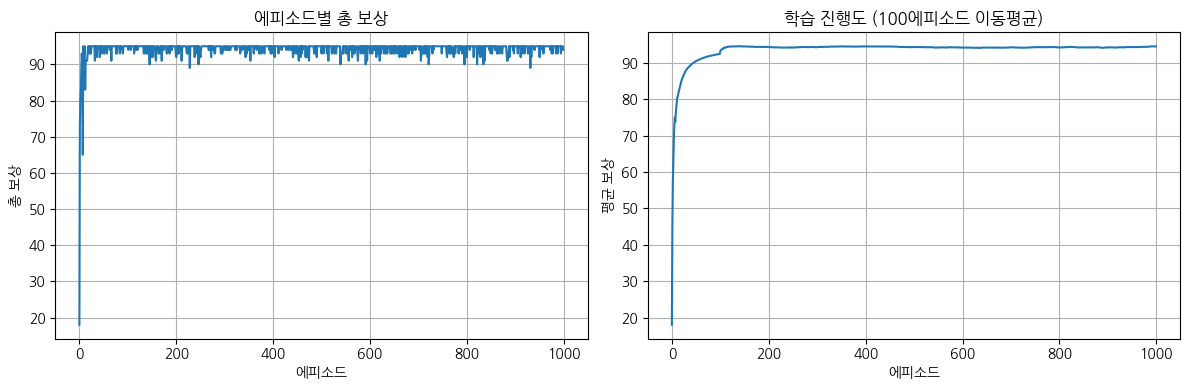

In [ ]:


# ÌïôÏäµ Í≥°ÏÑ† Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.title('ÏóêÌîºÏÜåÎìúÎ≥Ñ Ï¥ù Î≥¥ÏÉÅ')
plt.xlabel('ÏóêÌîºÏÜåÎìú')
plt.ylabel('Ï¥ù Î≥¥ÏÉÅ')
plt.grid(True)

# 100ÏóêÌîºÏÜåÎìú Ïù¥ÎèôÌèâÍ∑†
plt.subplot(1, 2, 2)
window_size = 100
moving_avg = []
for i in range(len(episode_rewards)):
    start_idx = max(0, i - window_size + 1)
    moving_avg.append(np.mean(episode_rewards[start_idx:i+1]))

plt.plot(moving_avg)
plt.title('ÌïôÏäµ ÏßÑÌñâÎèÑ (100ÏóêÌîºÏÜåÎìú Ïù¥ÎèôÌèâÍ∑†)')
plt.xlabel('ÏóêÌîºÏÜåÎìú')
plt.ylabel('ÌèâÍ∑† Î≥¥ÏÉÅ')
plt.grid(True)

plt.tight_layout()
plt.show()


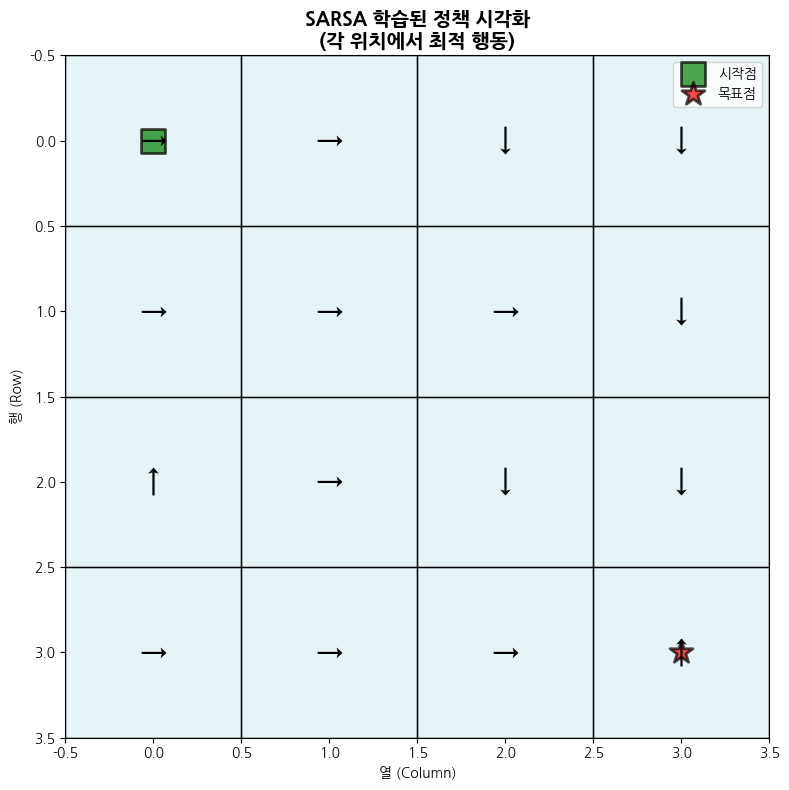

ÏãúÏûëÏ†ê: (0,0), Î™©ÌëúÏ†ê: (3,3)
ÌôîÏÇ¥ÌëúÎäî Í∞Å ÏúÑÏπòÏóêÏÑú ÌïôÏäµÎêú ÏµúÏ†Å ÌñâÎèôÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.


In [ ]:

# ÏµúÏ¢Ö Ï†ïÏ±Ö ÏãúÍ∞ÅÌôî
# ÏµúÏ¢Ö Ï†ïÏ±Ö ÏãúÍ∞ÅÌôî (Í∑∏ÎûòÌîÑ)
plt.figure(figsize=(8, 8))

# Ï†ïÏ±Ö Í≤©Ïûê ÏÉùÏÑ±
policy_grid = np.zeros((grid_size, grid_size), dtype=int)
for state in range(num_states):
    row, col = state_to_position(state)
    policy_grid[row, col] = np.argmax(q_table[state])

# Í≤©Ïûê Î∞∞Í≤Ω Í∑∏Î¶¨Í∏∞
for i in range(grid_size):
    for j in range(grid_size):
        plt.fill([j-0.5, j+0.5, j+0.5, j-0.5],
                 [i-0.5, i-0.5, i+0.5, i+0.5],
                 color='lightblue', alpha=0.3, edgecolor='black')

# ÌôîÏÇ¥Ìëú Í∑∏Î¶¨Í∏∞
arrow_symbols = ['‚Üë', '‚Üì', '‚Üê', '‚Üí']
arrow_dx = [0, 0, -0.3, 0.3]
arrow_dy = [0.3, -0.3, 0, 0]

for row in range(grid_size):
    for col in range(grid_size):
        action = policy_grid[row, col]
        # ÌôîÏÇ¥Ìëú ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
        plt.text(col, row, arrow_symbols[action],
                ha='center', va='center', fontsize=20, fontweight='bold')

# ÏãúÏûëÏ†êÍ≥º Î™©ÌëúÏ†ê ÌëúÏãú
start_row, start_col = 0, 0
goal_row, goal_col = grid_size-1, grid_size-1

plt.scatter(start_col, start_row, color='green', s=300, marker='s',
           label='ÏãúÏûëÏ†ê', alpha=0.7, edgecolors='black', linewidth=2)
plt.scatter(goal_col, goal_row, color='red', s=300, marker='*',
           label='Î™©ÌëúÏ†ê', alpha=0.7, edgecolors='black', linewidth=2)

# Í≤©ÏûêÏÑ† Í∑∏Î¶¨Í∏∞
for i in range(grid_size + 1):
    plt.axhline(y=i-0.5, color='black', linewidth=1)
    plt.axvline(x=i-0.5, color='black', linewidth=1)

plt.xlim(-0.5, grid_size-0.5)
plt.ylim(-0.5, grid_size-0.5)
plt.gca().invert_yaxis()  # yÏ∂ï Îí§ÏßëÍ∏∞ (Ìñâ Î≤àÌò∏ÏôÄ ÏùºÏπò)
plt.title('SARSA ÌïôÏäµÎêú Ï†ïÏ±Ö ÏãúÍ∞ÅÌôî\n(Í∞Å ÏúÑÏπòÏóêÏÑú ÏµúÏ†Å ÌñâÎèô)', fontsize=14, fontweight='bold')
plt.xlabel('Ïó¥ (Column)')
plt.ylabel('Ìñâ (Row)')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

print(f"ÏãúÏûëÏ†ê: (0,0), Î™©ÌëúÏ†ê: ({grid_size-1},{grid_size-1})")
print("ÌôîÏÇ¥ÌëúÎäî Í∞Å ÏúÑÏπòÏóêÏÑú ÌïôÏäµÎêú ÏµúÏ†Å ÌñâÎèôÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.")


